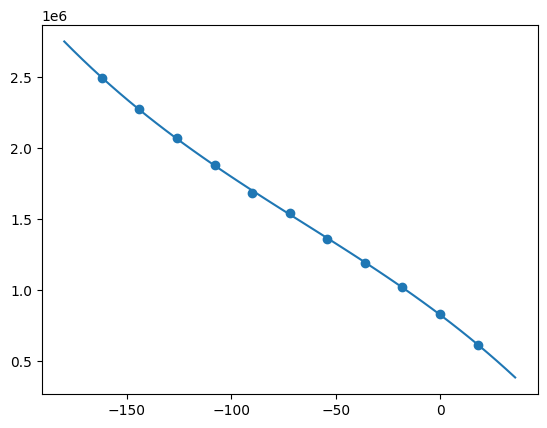

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

x = numpy.linspace(-180, 36)

servo_angle_pws = [
    [-162, 2490000],
    [-144, 2270000],
    [-126, 2070000],
    [-108, 1880000],
    [ -90, 1680000],
    [ -72, 1540000],
    [ -54, 1360000],
    [ -36, 1190000],
    [ -18, 1020000],
    [   0,  830000],
    [  18,  610000],
]

# for i in range(len(servo_1_array))[1:]:
#     print("Using %s terms" %i)
               
servo_array = numpy.array(servo_angle_pws)
angles_to_pw = numpy.poly1d(
    numpy.polyfit(
        servo_array[:,0],
        servo_array[:,1],
        3  # try different values to see how more/fewer terms in the polynomial function affect results
    )
)

plt.plot(x, angles_to_pw(x))
x, y = servo_array.T
plt.scatter(x, y)

In [ ]:
len(servo_1_array)

In [4]:
def interval_mapping(x, in_min, in_max, out_min, out_max):
    """
    Maps a value from one range to another.
    This function is useful for converting servo angle to pulse width.
    """
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [22]:
interval_mapping( 144,0, 180, 0.5, 2.5)
## duty_ns entspricht hier den Pulsewidth

2.1

In [9]:
def servo_write(angle):
    pulse_width = interval_mapping(angle, 0, 180, 0.5, 2.5)
    duty = int(interval_mapping(pulse_width, 0, 20, 0, 65535))
    return duty
   # pin.duty_u16(duty)

In [16]:
servo_write(162)

7536

In [ ]:
from brachiograph import BrachioGraph

bg = BrachioGraph(turtle=True)
bg.status()

bg.plot_file("images/demo.json")


In [ ]:
bg.box(bounds=[-3, 6, 3, 12])

In [1]:
import numpy


numpy.mean()


numpy.polyfit()

numpy.poly1d()

numpy.array()

In [51]:
a = [1,2,3,4]
b = [7,8,6,9]

z=numpy.polyfit(a,b,3)

k=numpy.poly1d([1,2,3],[4,5,6],3)
print(k(5))

24.0


In [12]:
def polyfit(x, y, degree):
    # Erstellen der Designmatrix
    X = [[xi**d for d in range(degree, -1, -1)] for xi in x]
    
    # Transponieren der Matrix X
    XT = list(zip(*X))
    
    # Matrixmultiplikation XT * X
    XT_X = [[sum(a*b for a, b in zip(XT_row, X_col)) for X_col in zip(*X)] for XT_row in XT]
    
    # Matrixmultiplikation XT * y
    XT_y = [sum(a*b for a, b in zip(XT_row, y)) for XT_row in XT]
    
    # Lösen des linearen Gleichungssystems XT_X * coeffs = XT_y
    coeffs = gauss_jordan(XT_X, XT_y)
    
    return coeffs

def gauss_jordan(A, b):
    n = len(b)
    M = [row[:] + [b[i]] for i, row in enumerate(A)]
    
    for i in range(n):
        # Pivotisierung
        max_row = max(range(i, n), key=lambda r: abs(M[r][i]))
        M[i], M[max_row] = M[max_row], M[i]
        
        # Normalisieren der Pivotzeile
        pivot = M[i][i]
        M[i] = [m / pivot for m in M[i]]
        
        # Eliminierung
        for j in range(n):
            if j != i:
                factor = M[j][i]
                M[j] = [m - factor * mi for m, mi in zip(M[j], M[i])]
    
    return [row[-1] for row in M]

# Beispielverwendung
a = [1,2,3,4]
b = [7,8,6,9]
degree = 3

coeffs = polyfit(a, b, degree)
print(coeffs)

[1.3333333333339836, -9.50000000000493, 20.166666666677784, -5.000000000007072]


In [52]:
class Poly1d:
    def __init__(self, coeffs):
        self.coeffs = coeffs

    def __call__(self, x):
        return sum(c * x**i for i, c in enumerate(reversed(self.coeffs)))

    def __add__(self, other):
        if isinstance(other, Poly1d):
            coeffs = [a + b for a, b in zip(self._pad(self.coeffs, other.coeffs), self._pad(other.coeffs, self.coeffs))]
        else:
            coeffs = self.coeffs[:]
            coeffs[-1] += other
        return Poly1d(coeffs)

    def __sub__(self, other):
        if isinstance(other, Poly1d):
            coeffs = [a - b for a, b in zip(self._pad(self.coeffs, other.coeffs), self._pad(other.coeffs, self.coeffs))]
        else:
            coeffs = self.coeffs[:]
            coeffs[-1] -= other
        return Poly1d(coeffs)

    def __mul__(self, other):
        if isinstance(other, Poly1d):
            coeffs = [0] * (len(self.coeffs) + len(other.coeffs) - 1)
            for i, a in enumerate(self.coeffs):
                for j, b in enumerate(other.coeffs):
                    coeffs[i + j] += a * b
        else:
            coeffs = [a * other for a in self.coeffs]
        return Poly1d(coeffs)

    def __repr__(self):
        return "Poly1d(" + " + ".join(f"{c}x^{i}" for i, c in enumerate(reversed(self.coeffs))) + ")"

    @staticmethod
    def _pad(a, b):
        return a + [0] * (len(b) - len(a))

# Beispielverwendung
p1 = Poly1d([1, 2, 3])  # 1x^2 + 2x + 3
p2 = Poly1d([3, 4])     # 3x + 4

print(p1)               # Poly1d(1x^2 + 2x^1 + 3x^0)
print(p2)               # Poly1d(3x^1 + 4x^0)
print(p1(2))            # Auswertung bei x=2
print(p1 + p2)          # Addition
print(p1 - p2)          # Subtraktion
print(p1 * p2)          # Multiplikation

p3 = Poly1d([1,2,3],[4,5,6],3)
print(p3(2))

Poly1d(3x^0 + 2x^1 + 1x^2)
Poly1d(4x^0 + 3x^1)
11
Poly1d(3x^0 + 6x^1 + 4x^2)
Poly1d(3x^0 + -2x^1 + -2x^2)
Poly1d(12x^0 + 17x^1 + 10x^2 + 3x^3)


TypeError: __init__() takes 2 positional arguments but 4 were given

In [59]:
class Poly1d:
    def __init__(self, *coeffs):
        self.coeffs_list = coeffs

    def __call__(self, x, index=0):
        coeffs = self.coeffs_list[index]
        return sum(c * x**i for i, c in enumerate(reversed(coeffs)))

    def add(self, other, index=0):
        coeffs = self.coeffs_list[index]
        if isinstance(other, Poly1d):
            other_coeffs = other.coeffs_list[index]
        else:
            other_coeffs = other
        new_coeffs = [a + b for a, b in zip(self._pad(coeffs, other_coeffs), self._pad(other_coeffs, coeffs))]
        return Poly1d(new_coeffs)

    def sub(self, other, index=0):
        coeffs = self.coeffs_list[index]
        if isinstance(other, Poly1d):
            other_coeffs = other.coeffs_list[index]
        else:
            other_coeffs = other
        new_coeffs = [a - b for a, b in zip(self._pad(coeffs, other_coeffs), self._pad(other_coeffs, coeffs))]
        return Poly1d(new_coeffs)

    def mul(self, other, index=0):
        coeffs = self.coeffs_list[index]
        if isinstance(other, Poly1d):
            other_coeffs = other.coeffs_list[index]
        else:
            other_coeffs = other
        new_coeffs = [0] * (len(coeffs) + len(other_coeffs) - 1)
        for i, a in enumerate(coeffs):
            for j, b in enumerate(other_coeffs):
                new_coeffs[i + j] += a * b
        return Poly1d(new_coeffs)

    def _pad(self, a, b):
        return a + [0] * (len(b) - len(a))

    def __repr__(self):
        return "Poly1d(" + ", ".join(f"{coeffs}" for coeffs in self.coeffs_list) + ")"

# # Beispielverwendung
# p = Poly1d([1, 2, 3], [7, 8, 9], [4, 5, 6])  # Mehrere Polynomkoeffizienten

# print(p(2, 0))  # Auswertung des ersten Polynoms bei x=2
# print(p(2, 1))  # Auswertung des zweiten Polynoms bei x=2
# print(p(2, 2))  # Auswertung des dritten Polynoms bei x=2

# p1 = Poly1d([1, 2, 3])
# p2 = Poly1d([3, 4])

# print(p1.add(p2, 0).coeffs_list)  # Addition
# print(p1.sub(p2, 0).coeffs_list)  # Subtraktion
# print(p1.mul(p2, 0).coeffs_list)  # Multiplikation


t = Poly1d([1,2,3],[4,5,6])
print(t(5))
t.add()

38


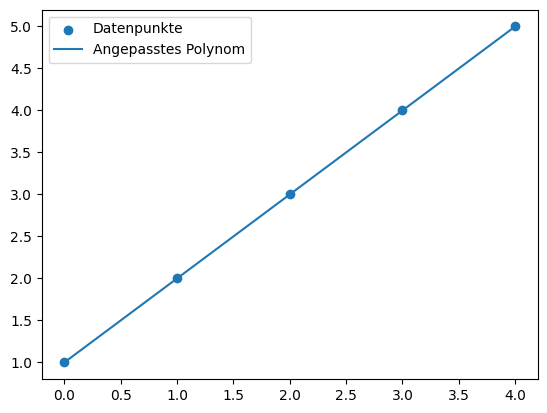

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Daten
servo_1_array = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]])

# Polynom dritten Grades anpassen
coeffs = np.polyfit(servo_1_array[:, 0], servo_1_array[:, 1], 3)
polynom = np.poly1d(coeffs)

# Polynom auswerten
x = np.linspace(0, 4, 100)
y = polynom(x)

# Daten und Polynom plotten
plt.scatter(servo_1_array[:, 0], servo_1_array[:, 1], label='Datenpunkte')
plt.plot(x, y, label='Angepasstes Polynom')
plt.legend()
plt.show()


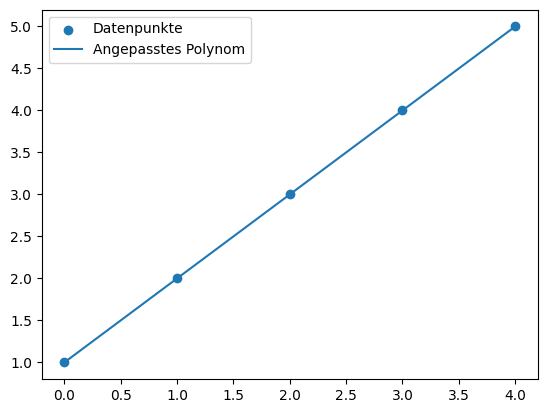

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Daten
servo_1_array = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]

# Polynom dritten Grades anpassen
#polyfit(servo_1_array[:, 0], servo_1_array[:, 1], 3)
coeffs =  polyfit([row[0] for row in servo_1_array], [row[1] for row in servo_1_array], 3)
polynom = Poly1d(coeffs)

# Polynom auswerten
x = np.linspace(0, 4, 100)
y = polynom(x)

# Daten und Polynom plotten
plt.scatter([row[0] for row in servo_1_array], [row[1] for row in servo_1_array], label='Datenpunkte')
plt.plot(x, y, label='Angepasstes Polynom')
plt.legend()
plt.show()


In [67]:
def polyfit(x, y, degree):
    # Erstellen der Designmatrix
    X = [[xi**d for d in range(degree, -1, -1)] for xi in x]
    
    # Transponieren der Matrix X
    XT = list(zip(*X))
    
    # Matrixmultiplikation XT * X
    XT_X = [[sum(a*b for a, b in zip(XT_row, X_col)) for X_col in zip(*X)] for XT_row in XT]
    
    # Matrixmultiplikation XT * y
    XT_y = [sum(a*b for a, b in zip(XT_row, y)) for XT_row in XT]
    
    # Lösen des linearen Gleichungssystems XT_X * coeffs = XT_y
    coeffs = gauss_jordan(XT_X, XT_y)
    
    return coeffs

def gauss_jordan(A, b):
    n = len(b)
    M = [row[:] + [b[i]] for i, row in enumerate(A)]
    
    for i in range(n):
        # Pivotisierung
        max_row = max(range(i, n), key=lambda r: abs(M[r][i]))
        M[i], M[max_row] = M[max_row], M[i]
        
        # Normalisieren der Pivotzeile
        pivot = M[i][i]
        M[i] = [m / pivot for m in M[i]]
        
        # Eliminierung
        for j in range(n):
            if j != i:
                factor = M[j][i]
                M[j] = [m - factor * mi for m, mi in zip(M[j], M[i])]
    
    return [row[-1] for row in M]

# Beispielaufruf
servo_1_array = [[1, 2], [2, 3], [3, 4]]  # Beispiel-Daten
coeffs = polyfit([row[0] for row in servo_1_array], [row[1] for row in servo_1_array], 3)
print(coeffs)
### micropython

[-0.061403508771929044, 0.3684210526315759, 0.32456140350877494, 1.368421052631579]


In [65]:
def mean(data):
    # Berechnen der Summe der Elemente
    total = sum(data)
    
    # Berechnen der Anzahl der Elemente
    count = len(data)
    
    # Berechnen des Mittelwerts
    return total / count if count != 0 else 0

# Beispielaufruf
data = [1, 2, 3, 4, 5]
print(mean(data))  # Ausgabe: 3.0
print(mean())

3.0


In [66]:
import array

def create_array(data, typecode='f'):
    return array.array(typecode, data)

# Beispielaufruf
data = [1.0, 2.0, 3.0, 4.0, 5.0]
arr = create_array(data)
print(arr)


array('f', [1.0, 2.0, 3.0, 4.0, 5.0])


In [3]:
import micronumpy



servo_1_array = [[1, 2], [2, 3], [3, 4]]  # Beispiel-Daten
coeffs = micronumpy.polyfit([row[0] for row in servo_1_array], [row[1] for row in servo_1_array], 3)

print(coeffs)

t = micronumpy.Poly1d([1,2,3],[4,5,6])
print(t(5))

[-0.061403508771929044, 0.3684210526315759, 0.32456140350877494, 1.368421052631579]
38


In [11]:
from time import sleep, monotonic
import time

print(time.monotonic())
sleep(1)
print(time.monotonic())
print(time.monotonic()-0.01)

429414.75
429415.75
429415.74


In [25]:
wait=0.01
last_moved = monotonic()
time_since_last_moved = monotonic() - last_moved
if time_since_last_moved < wait:
    sleep(wait - time_since_last_moved)
sleep(1)

last_moved = monotonic()

0.01
time_since_last_moved
0.0


In [42]:
from time import sleep

def ease_pen(start, end):
    """
    Moves the pen gently instead of all at once. Slower but reduces marking on the paper.
    """
    diff = end - start
    print("diff: ", diff)
    angle = start
    print("angle: ", angle)
    length_of_step = diff / abs(diff)
    length_of_step = length_of_step*1000
    print("length_of_step: ", length_of_step)
    

    for i in range(0,abs(diff),1000):
        angle += length_of_step
        print("angle range: ", angle)
        #self.pwm3.duty_ns(int(angle))
        sleep(0.001)


In [41]:
for i in range(abs(400000), 1000):
    print("gag",i)
print("f")

f


In [24]:
pw_up=1700
pw_down=1300

ease_pen(pw_down,pw_up)

diff:  400
angle:  1300
length_of_step:  1.0
angle range:  1300
angle range:  1301
angle range:  1303
angle range:  1306
angle range:  1310
angle range:  1315
angle range:  1321
angle range:  1328
angle range:  1336
angle range:  1345
angle range:  1355
angle range:  1366
angle range:  1378
angle range:  1391
angle range:  1405
angle range:  1420
angle range:  1436
angle range:  1453
angle range:  1471
angle range:  1490
angle range:  1510
angle range:  1531
angle range:  1553
angle range:  1576
angle range:  1600
angle range:  1625
angle range:  1651
angle range:  1678
angle range:  1706
angle range:  1735
angle range:  1765
angle range:  1796
angle range:  1828
angle range:  1861
angle range:  1895
angle range:  1930
angle range:  1966
angle range:  2003
angle range:  2041
angle range:  2080
angle range:  2120
angle range:  2161
angle range:  2203
angle range:  2246
angle range:  2290
angle range:  2335
angle range:  2381
angle range:  2428
angle range:  2476
angle range:  2525
angle

In [44]:
pw_up=1700000
pw_down=1300000

ease_pen(pw_up,pw_down)

diff:  -400000
angle:  1700000
length_of_step:  -1000.0
angle range:  1699000.0
angle range:  1698000.0
angle range:  1697000.0
angle range:  1696000.0
angle range:  1695000.0
angle range:  1694000.0
angle range:  1693000.0
angle range:  1692000.0
angle range:  1691000.0
angle range:  1690000.0
angle range:  1689000.0
angle range:  1688000.0
angle range:  1687000.0
angle range:  1686000.0
angle range:  1685000.0
angle range:  1684000.0
angle range:  1683000.0
angle range:  1682000.0
angle range:  1681000.0
angle range:  1680000.0
angle range:  1679000.0
angle range:  1678000.0
angle range:  1677000.0
angle range:  1676000.0
angle range:  1675000.0
angle range:  1674000.0
angle range:  1673000.0
angle range:  1672000.0
angle range:  1671000.0
angle range:  1670000.0
angle range:  1669000.0
angle range:  1668000.0
angle range:  1667000.0
angle range:  1666000.0
angle range:  1665000.0
angle range:  1664000.0
angle range:  1663000.0
angle range:  1662000.0
angle range:  1661000.0
angle ra